In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [3]:
data = pd.read_csv('loan_borowwer_data.csv')

In [4]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [10]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
credit.policy,9578,NaN,NaN,NaN,0.80497,0.396245,0,1,1,1,1
purpose,9578,7,debt_consolidation,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int.rate,9578,NaN,NaN,NaN,0.12264,0.026847,0.06,0.1039,0.1221,0.1407,0.2164
installment,9578,NaN,NaN,NaN,319.089,207.071,15.67,163.77,268.95,432.762,940.14
log.annual.inc,9578,NaN,NaN,NaN,10.9321,0.614813,7.5475,10.5584,10.9289,11.2913,14.5284
dti,9578,NaN,NaN,NaN,12.6067,6.88397,0,7.2125,12.665,17.95,29.96
fico,9578,NaN,NaN,NaN,710.846,37.9705,612,682,707,737,827
days.with.cr.line,9578,NaN,NaN,NaN,4560.77,2496.93,178.958,2820,4139.96,5730,17640
revol.bal,9578,NaN,NaN,NaN,16914,33756.2,0,3187,8596,18249.5,1.20736e+06
revol.util,9578,NaN,NaN,NaN,46.7992,29.0144,0,22.6,46.3,70.9,119


In [12]:
# label encoding:
encoder = LabelEncoder()
data['purpose'] = encoder.fit_transform(data['purpose'])

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

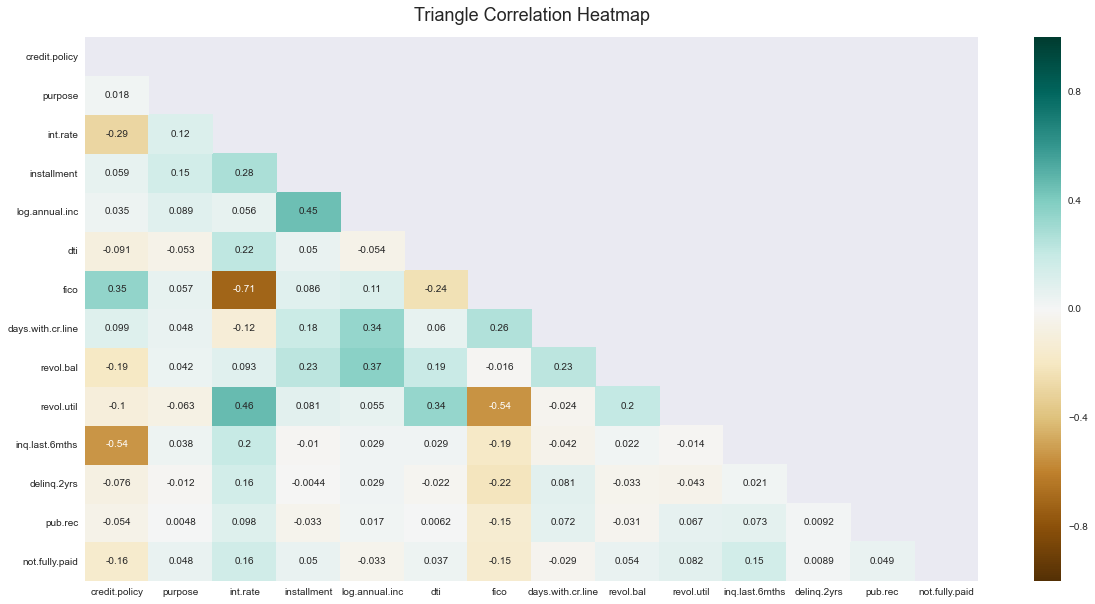

In [26]:
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [14]:
data['purpose'].value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

In [16]:
x= data.drop(['not.fully.paid'],axis=1)
y= data['not.fully.paid']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7662, 13)
(7662,)
(1916, 13)
(1916,)


In [21]:
# classification model building:

In [24]:
forest = RandomForestClassifier(n_estimators=300)
forest = forest.fit(x_train,y_train)
y_predict = forest.predict(x_test)
# Check Accuracy Score
accuracy_score(y_predict, y_test)

0.8387265135699373